# Community challenge: onvoorspelbaar weer

Het Nederlands Meteorologisch Instituut(NMI) heeft gevraagd om een app te bouwen die de weersvoorspelling geeft. In de applicatie wordt weergegeven wat het weer is voor de komende 7 dagen. Het Weer-instituut hecht de meeste waarde aan de temperatuur en of het regent, extra gegevens zijn natuurlijk altijd welkom.

## Weersvoorspelling voor de komende 7 dagen

Gezien de vervolgopdrachten wordt er willekeurig een weerspatroon gegenereerd. Om nu een enigszins reëel weerbeeld te genereren, is op [knmi.nl](https://www.knmi.nl/klimaat-viewer/grafieken-tabellen/langjarige-gemiddelden/lh15/lh15_1991-2020) opgezocht welke temperaturen er zijn en hoe vaak het regent per maand. Deze gegevens zijn de basis voor de weersvoorspelling. Er wordt aangenomen dat de temperaturen per maand redelijk normaal verdeeld zijn. De minimum en maximum waarde voor de temperatuur wordt als 2-sigma aangenomen. De kans op regen is uniform verdeeld.


In [1]:
import random
import datetime


def genereer_temperatuur(dag, gisteren=None):
    # Gemiddelde temperaturen per maand
    temp_min = [ 0.8, 0.7,  2.4,  4.6,  8.1, 10.9, 13.2, 12.9, 10.4,  7.3, 4.0, 1.6 ]
    temp_max = [ 5.9, 6.7, 10.1, 14.4, 17.9, 20.6, 22.8, 22.7, 19.3, 14.6, 9.7, 6.5 ]
    
    maand = dag.month
    
    # Gemiddelde temperatuur uitrekenen of die van gisteren gebruiken
    if gisteren is None:
        temp_avg = float((temp_max[maand] + temp_min[maand]) / 2)
    else:
        temp_avg = gisteren
    
    # Range is op basis van +/- 2 sigma (95% van de gevallen liggen hierin)
    # De standaarddeviatie is dan range / (2 * 2)
    temp_range = temp_max[maand] - temp_min[maand]
    temp_sigma = float(temp_range / 4)
    
    temperatuur = random.gauss(temp_avg, temp_sigma)
    
    return temperatuur


def genereer_regen_kans(dag):
    # Kans op regen, afhankelijk van de maand (regent het echt zo vaak?)
    regen_kans_maand = [ .71, .68, .60, .54, .54, .56, .58, .59, .58, .63, .72, .72 ]
    
    # Random getal tussen de 0 en de 1
    # als getal <= kans op regen (in de maand), dan regent het
    regen_kans = random.random()
    regen = regen_kans <= regen_kans_maand[dag.month]
    
    # Hoe erg regent het (aantal druppeltjes)
    regen_intensiteit = [3, 2, 3, 2, 2, 3, 2, 1, 2, 3, 3, 3]
    if regen:
        intensiteit = random.randint(0, regen_intensiteit[dag.month])
    else:
        intensiteit = 0
    
    return regen, regen_kans_maand[dag.month], intensiteit

    
def weersvoorspelling(aantal_dagen):
    # Genereer weervoorspelling voor n aantal dagen
    voorspelling = []
    
    print(f'De weersvoorspelling voor de komende {aantal_dagen} dagen is:')

    temperatuur = None
    for i in range(0, aantal_dagen):
        dag = datetime.date.today() + datetime.timedelta(days=i+1)

        temperatuur = genereer_temperatuur(dag, temperatuur)
        regen, regen_kans, regen_intensiteit = genereer_regen_kans(dag)

        if regen:
            regen = "Regen"
        else: 
            regen = "Geen regen"

        print(f'Voorspelling voor {dag}: {temperatuur:0.0f}\N{DEGREE SIGN}C {regen}')
        
        voorspelling.append([dag, temperatuur, regen, regen_kans, regen_intensiteit])
    
    return voorspelling


# Verzin een weersvoorspelling, sla het resultaat op
voorspelling = weersvoorspelling(7)

De weersvoorspelling voor de komende 7 dagen is:
Voorspelling voor 2022-01-23: 4°C Regen
Voorspelling voor 2022-01-24: 7°C Regen
Voorspelling voor 2022-01-25: 6°C Regen
Voorspelling voor 2022-01-26: 8°C Regen
Voorspelling voor 2022-01-27: 7°C Regen
Voorspelling voor 2022-01-28: 6°C Geen regen
Voorspelling voor 2022-01-29: 7°C Geen regen


Een tabel zegt niet zo veel. Een grafiek is veel duidelijker om te laten zien. Laten we eens kijken hoe ver we kunnen komen met seaborn.

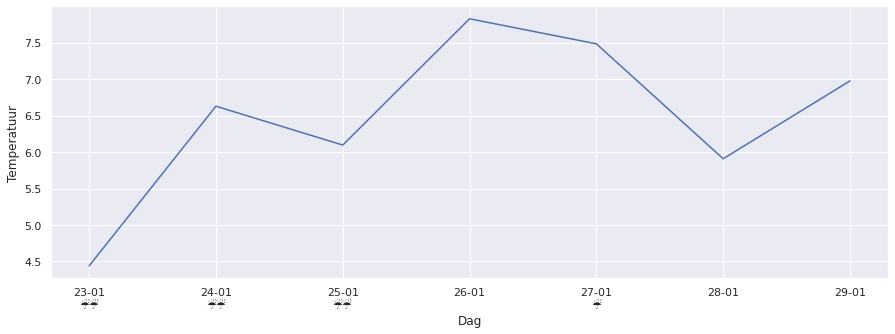

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

voorspelling = pd.DataFrame(
    voorspelling, 
    columns=['Dag', 'Temperatuur', 'Regen', 'Regen_kans', 'Regen_intensiteit'])

sns.set_theme()

# Lettergrootte aanpassen
plt.rcParams.update({'font.size': 20})

# Figuur aanmaken
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Temperatuur tekenen
sns.lineplot(data=voorspelling, x='Dag', y='Temperatuur', ax=ax)

# Legenda aanpassen
# We beginnen met de dagen, daaronder meer info
legenda = voorspelling["Dag"].to_list()
regen = voorspelling["Regen_intensiteit"].to_list()

for i, l in enumerate(legenda):
    label = [l.strftime('%d-%m'), '\n']
    for druppel in range(regen[i]):
        label.append('\U00002614')
    
    legenda[i] = ''.join(label)
    
plt.xticks(voorspelling["Dag"], legenda)
plt.show()

## Korte broek aan of niet

Als extra feature wil het NMI graag weten op welke dagen je een korte broek aan kan. Wetenschappers van het NMI hebben onderzocht, dat je een korte broek kan aandoen bij meer dan 18 graden en als het niet regent. Op zondag kan een korte broek altijd.

Om een advies te geven of een korte broek kan of niet, wordt een derde functie geschreven. De weersvoorspelling-functie wordt uitgebreid met dit advies.

Nu is het NMI niet alleen benieuwd naar de voorspelling voor de komende 7 dagen, maar wil ze ook graag voor de komende 14 dagen een voorspelling hebben. Maak een script dat een random weersvoorspelling genereert voor de komende 14 dagen, en check op welke dagen je een korte broek aan kan.

De weersvoorspelling voor de komende 14 dagen is:


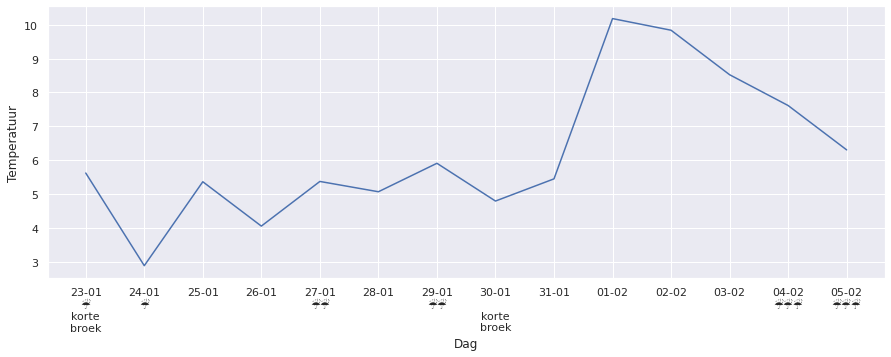

In [3]:
def korte_broek_aan(dag, temp, regen):
    return (dag.isoweekday() == 7) or (temp > 18 and regen == False)

    
def weersvoorspelling_broek(aantal_dagen):
    # Genereer weervoorspelling voor n aantal dagen
    voorspelling = []
    
    print(f'De weersvoorspelling voor de komende {aantal_dagen} dagen is:')

    temperatuur = None
    for i in range(0, aantal_dagen):
        dag = datetime.date.today() + datetime.timedelta(days=i+1)

        temperatuur = genereer_temperatuur(dag, temperatuur)
        regen, regen_kans, regen_intensiteit = genereer_regen_kans(dag)
        broek = korte_broek_aan(dag, temperatuur, regen)

        if regen:
            regen_of_niet = "Regen"
        else: 
            regen_of_niet = "Geen regen"
            
        korte_broek_mag_aan = ""
        if broek:
            korte_broek_mag_aan = "Trek die korte broek maar aan"
            

        #print(f'{dag} Temp: {temperatuur:3.1f}\N{DEGREE SIGN}C {regen_of_niet} {korte_broek_mag_aan}')
        
        voorspelling.append([dag, temperatuur, regen, regen_kans, regen_intensiteit, broek])
        
    return voorspelling


# Voorspelling dataframe aanmaken
voorspelling2 = pd.DataFrame(
    weersvoorspelling_broek(14), 
    columns=['Dag', 'Temperatuur', 'Regen', 'Regen_kans', 'Regen_intensiteit', 'Broek'])

# Lettergrootte aanpassen
plt.rcParams.update({'font.size': 10})

# Figuur aanmaken
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Temperatuur tekenen
sns.lineplot(data=voorspelling2, x='Dag', y='Temperatuur', ax=ax)

# Legenda aanpassen
# We beginnen met de dagen, daaronder meer info
legenda = voorspelling2["Dag"].to_list()
regen = voorspelling2["Regen_intensiteit"].to_list()
broek = voorspelling2["Broek"].to_list()

for i, l in enumerate(legenda):
    label = [l.strftime('%d-%m'), '\n']
    for druppel in range(regen[i]):
        label.append('\U00002614')
    label.append('\n')
    if broek[i]:
        label.append('korte\nbroek')
    
    legenda[i] = ''.join(label)
    
plt.xticks(voorspelling2["Dag"], legenda)
plt.show()

## Bonus

Het NMI is erachtergekomen dat je voorspellingen uiterst onbetrouwbaar zijn. Fix je voorspellingen met behulp van een weer-API.

Met dank aan [buienradar.nl](https://www.buienradar.nl) is er een vrij toegankelijke weerspelling beschikbaar. Deze wordt in een `json` document teruggegeven. Dit document wordt via `requests` opgehaald en de weersvoorspelling wordt eruit gehaald. De gemiddelde temperatuur en kans op regen worden berekend. Of het regent of niet is afhankelijk van de kans op regen in de betreffende maand.


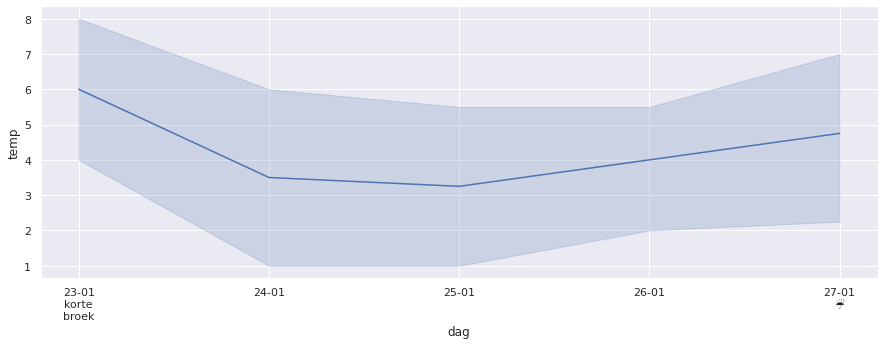

In [4]:
import requests
import datetime
import dateutil
import itertools


# Informatie uit de JSON van Buienradar halen
def parse_weerinfo(item):
    # voorspelling van welke dag?
    dag = dateutil.parser.parse(item["day"])
    
    # Gemiddelde voorspelde temperatuur berekenen
    temperature = []
    for key in ["maxtemperatureMax", "maxtemperatureMin", "mintemperatureMax", "mintemperatureMin"]:
        temperature.append(item[key])
    
    # Kans op regen, afhankelijk van de maand
    regen_kans_maand = [ .71, .68, .60, .54, .54, .56, .58, .59, .58, .63, .72, .72 ]
    regen_kans = float(item["rainChance"] / 100)
    regen = regen_kans > regen_kans_maand[dag.month]
    
    return dag, temperature, regen, regen_kans


# Call naar buienradar API
r = requests.get('https://data.buienradar.nl/2.0/feed/json')


# Weersvoorspelling opslaan
voorspelling = []
for info in r.json()["forecast"]["fivedayforecast"]:
    weer = parse_weerinfo(info)
    voorspelling.append(weer)

    
# Weersvoorspelling omzetten naar DataFrame
temperaturen = []
for weer in voorspelling:
    dag, temperature, regen, regen_kans = weer
    temperaturen.append(zip(temperature, itertools.repeat(dag)))
temperaturen = list(itertools.chain.from_iterable(temperaturen))
temp = pd.DataFrame(temperaturen, columns=['temp', 'dag'])


# Grafiek tekenen
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
g = sns.lineplot(data=temp, x="dag", y="temp")

# Legenda aanpassen
voorspelling = pd.DataFrame(voorspelling, columns=['dag', 'temps', 'regen', 'regen_kans'])

# We beginnen met de dagen, daaronder meer info
legenda = voorspelling["dag"].to_list()
regen = voorspelling["regen_kans"].to_list()
temperaturen = temp.groupby(by="dag").mean().values

labels = []
for i, l in enumerate(legenda):
    label = [l.strftime('%d-%m'), '\n']
    
    if regen[i] > 0.8: label.append('\U00002614')  # ☔
    if regen[i] > 0.5: label.append('\U00002614')  # ☔
    if regen[i] > 0.3: label.append('\U00002614')  # ☔

    if korte_broek_aan(l, temperaturen[i], regen[i]<0.2): 
        label.append('korte\nbroek')
    labels.append(''.join(label))
    
g.set_xticks(legenda)
g.set_xticklabels(labels)
plt.show()